In [21]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA

In [4]:
# 1. Провести повний аналіз даних.
# Імпортування даних та виведення перших 5 рядків

df = pd.read_csv("Student_performance_data _.csv")

df.head(5)

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


In [5]:
df.shape

(2392, 15)

In [6]:
df.columns

Index(['StudentID', 'Age', 'Gender', 'Ethnicity', 'ParentalEducation',
       'StudyTimeWeekly', 'Absences', 'Tutoring', 'ParentalSupport',
       'Extracurricular', 'Sports', 'Music', 'Volunteering', 'GPA',
       'GradeClass'],
      dtype='object')

In [7]:
df.dtypes

StudentID              int64
Age                    int64
Gender                 int64
Ethnicity              int64
ParentalEducation      int64
StudyTimeWeekly      float64
Absences               int64
Tutoring               int64
ParentalSupport        int64
Extracurricular        int64
Sports                 int64
Music                  int64
Volunteering           int64
GPA                  float64
GradeClass           float64
dtype: object

In [8]:
df.isna().sum()

StudentID            0
Age                  0
Gender               0
Ethnicity            0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
GPA                  0
GradeClass           0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
# Assuming df is your DataFrame
unique_counts = df.nunique()

# Print the number of unique values for each column
print(unique_counts)

StudentID            2392
Age                     4
Gender                  2
Ethnicity               4
ParentalEducation       5
StudyTimeWeekly      2392
Absences               30
Tutoring                2
ParentalSupport         5
Extracurricular         2
Sports                  2
Music                   2
Volunteering            2
GPA                  2371
GradeClass              5
dtype: int64


In [11]:
# Студентський квиток не містить жодних корисних даних.
# GPA дорівнює класу Grade, тому ми повинні ігнорувати один з них.

df.drop(['StudentID', 'GPA'], axis=1, inplace=True)

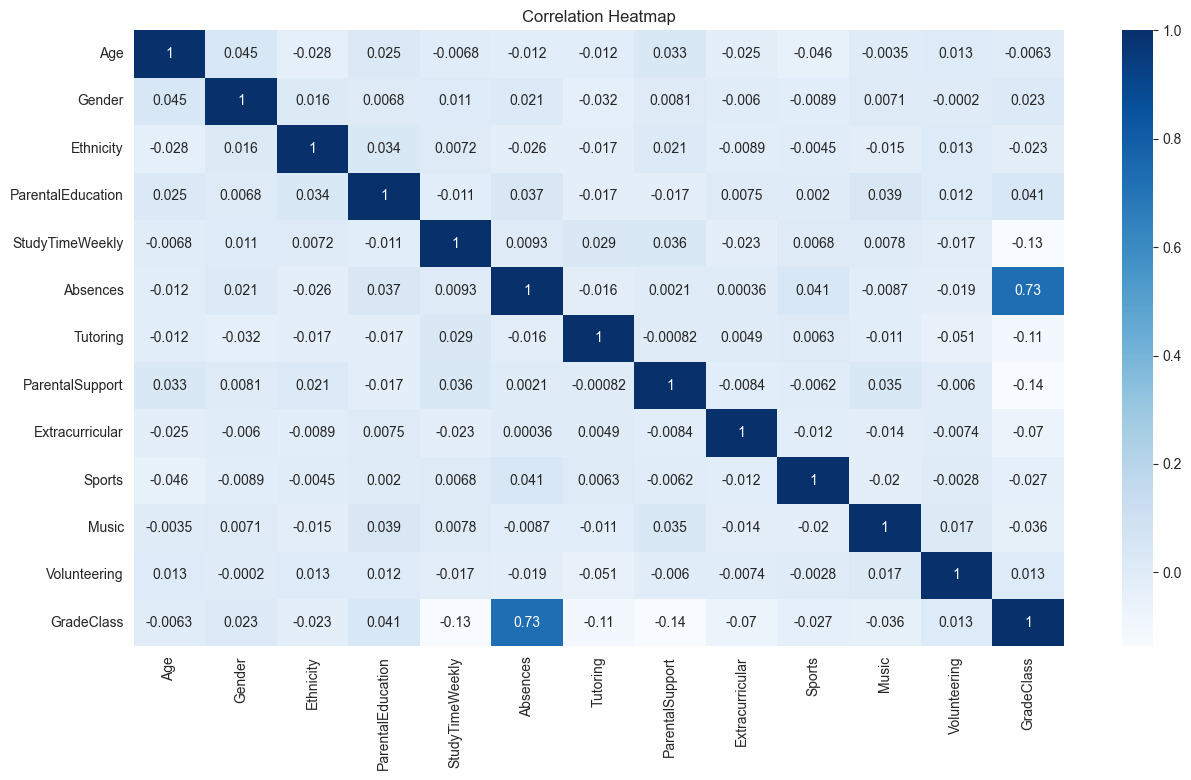

In [12]:
# Теплова карта кореляційної матриці
numeric = df

plt.figure(figsize=(15, 8))
sns.heatmap(numeric.corr(), annot=True, cbar=True,cmap='Blues')
plt.title('Correlation Heatmap')
plt.show()

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Gender'}>,
        <Axes: title={'center': 'Ethnicity'}>,
        <Axes: title={'center': 'ParentalEducation'}>],
       [<Axes: title={'center': 'StudyTimeWeekly'}>,
        <Axes: title={'center': 'Absences'}>,
        <Axes: title={'center': 'Tutoring'}>,
        <Axes: title={'center': 'ParentalSupport'}>],
       [<Axes: title={'center': 'Extracurricular'}>,
        <Axes: title={'center': 'Sports'}>,
        <Axes: title={'center': 'Music'}>,
        <Axes: title={'center': 'Volunteering'}>],
       [<Axes: title={'center': 'GradeClass'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

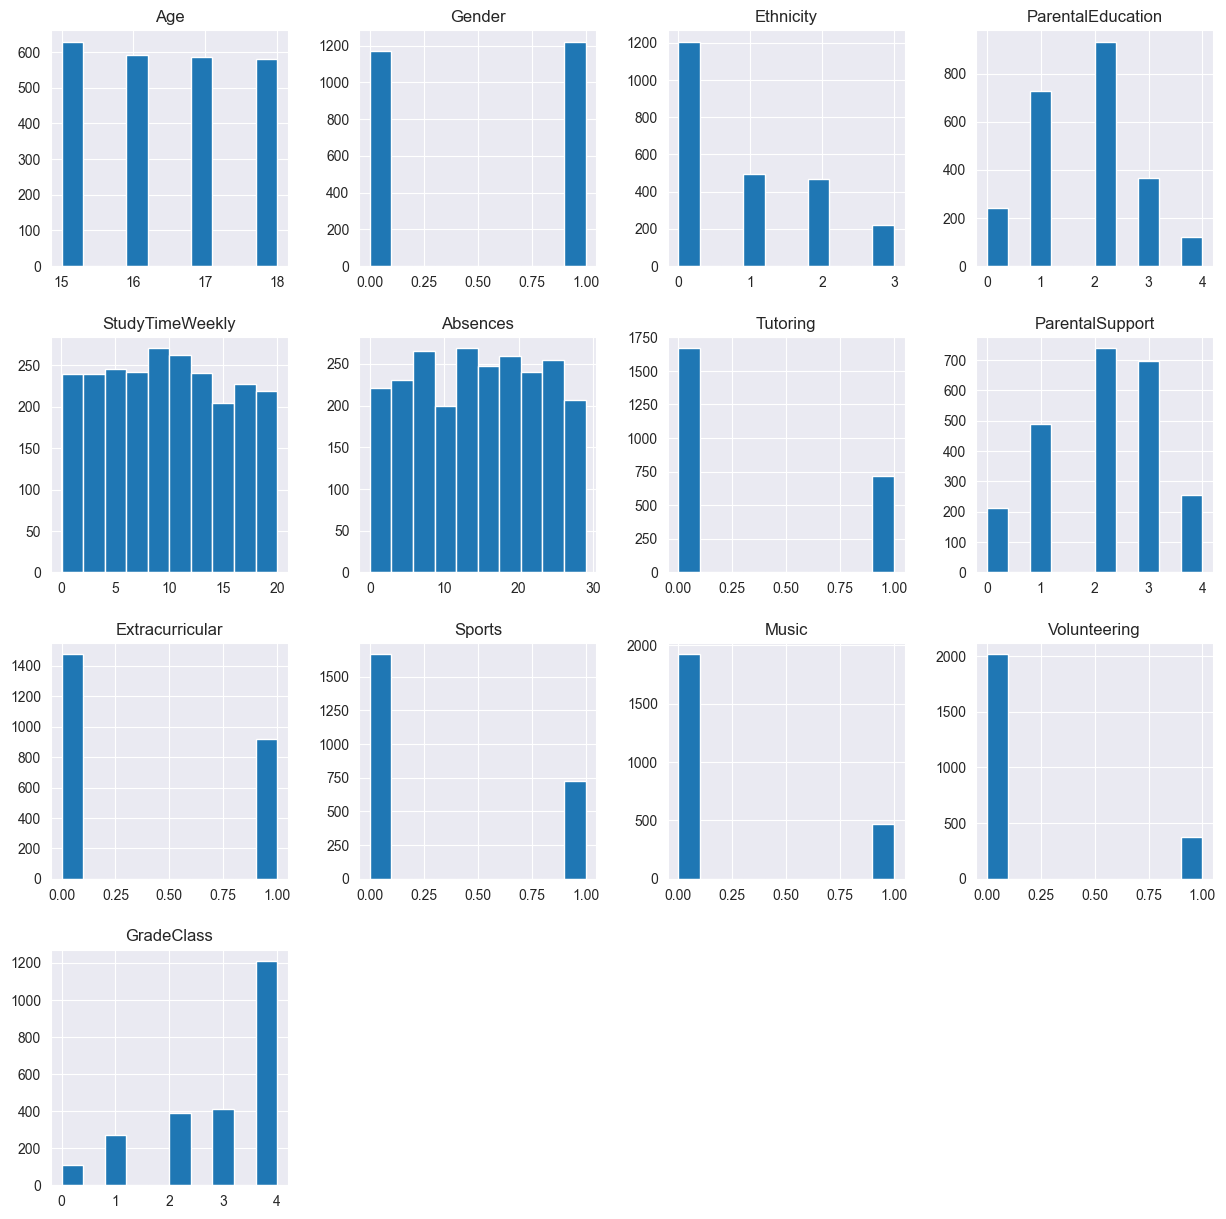

In [13]:
# Показ гістограм по співвідношенням характеристик
df.hist(figsize=(15, 15))

In [14]:
# Розбиваємо дані
x = df.drop('GradeClass', axis=1)
y = df['GradeClass']


# Створюємо тренувальні та тестові дані у співвідношенні 70/30
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)


scaler = StandardScaler()

# Робимо масштабування даних
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled= scaler.transform(x_test)

In [15]:
# Випадковий ліс
rf = RandomForestClassifier(random_state=42)
rf_params = {'n_estimators': [100, 200], 'max_depth': [10, 20, None]}
rf_grid = GridSearchCV(rf, rf_params, cv=5)
rf_grid.fit(x_train_scaled, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [10, 20, None],
                         'n_estimators': [100, 200]})

In [16]:
# Логістична регресія
lr = LogisticRegression(random_state=42, max_iter=1000)
lr_params = {'C': [0.1, 1, 10]}
lr_grid = GridSearchCV(lr, lr_params, cv=5)
lr_grid.fit(x_train_scaled, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000, random_state=42),
             param_grid={'C': [0.1, 1, 10]})

In [17]:
# Оцінка моделей
y_pred_rf = rf_grid.predict(x_test_scaled)
y_pred_lr = lr_grid.predict(x_test_scaled)

In [18]:
# Оцінка для випадкового лісу
print("Випадковий ліс:")
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy: {rf_accuracy}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))

# Оцінка для логістичної регресії
print("\nЛогістична регресія:")
lr_accuracy = accuracy_score(y_test, y_pred_lr)
print(f"Accuracy: {lr_accuracy}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_lr))
print("Classification Report:")
print(classification_report(y_test, y_pred_lr))

# Вибір найкращої моделі на основі точності
if rf_accuracy > lr_accuracy:
    print("\nВипадковий ліс є краща модель.")
else:
    print("\nЛогістична регресія є краща модель.")

Випадковий ліс:
Accuracy: 0.6894150417827298
Confusion Matrix:
[[  3  16   6   3   5]
 [  2  37  34   1   6]
 [  1  18  70  25   7]
 [  0   2  37  47  41]
 [  0   1   2  16 338]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.50      0.09      0.15        33
         1.0       0.50      0.46      0.48        80
         2.0       0.47      0.58      0.52       121
         3.0       0.51      0.37      0.43       127
         4.0       0.85      0.95      0.90       357

    accuracy                           0.69       718
   macro avg       0.57      0.49      0.50       718
weighted avg       0.67      0.69      0.67       718


Логістична регресія:
Accuracy: 0.6908077994428969
Confusion Matrix:
[[  1  19   5   3   5]
 [  7  31  34   2   6]
 [  1  16  75  22   7]
 [  1   2  28  47  49]
 [  0   1   2  12 342]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.10      0.03      0.05   

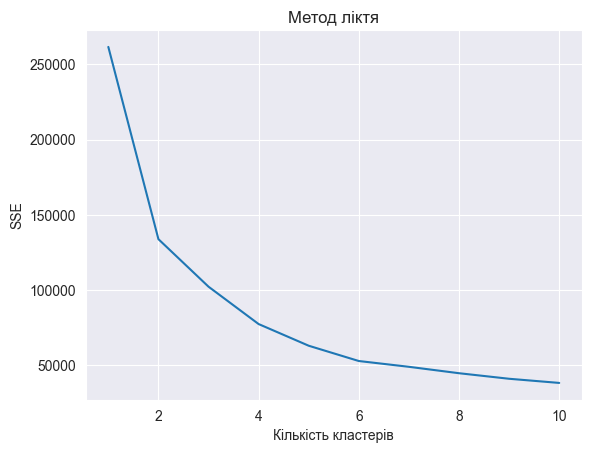

In [19]:
# 3. Методом ліктя і методом силуєтів визначити оптимальну кількість кластерів.
# Метод ліктя
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.xlabel('Кількість кластерів')
plt.ylabel('SSE')
plt.title('Метод ліктя')
plt.show()

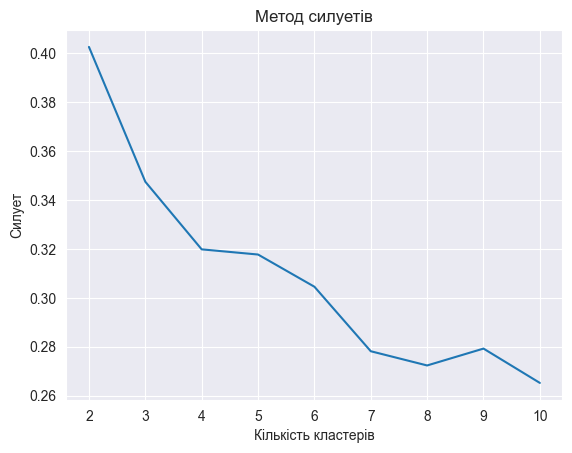

In [20]:
# Метод силуетів
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(x)
    silhouette_scores.append(silhouette_score(x, labels))

plt.plot(range(2, 11), silhouette_scores)
plt.xlabel('Кількість кластерів')
plt.ylabel('Силует')
plt.title('Метод силуетів')
plt.show()

In [22]:
def find_elbow(wcss):
    X = range(1, len(wcss) + 1)
    # Обчислення перших похідних
    first_derivative = np.diff(wcss)
    # Обчислення других похідних
    second_derivative = np.diff(first_derivative)
    # Знаходження індексу з найбільшою другою похідною
    optimal_k = np.argmax(second_derivative) + 2  # +2 через зміщення диференціювання
    return optimal_k

optimal_clusters = find_elbow(wcss)
print(f'Оптимальна кількість кластерів за методу ліктя: {optimal_clusters}')
print(f"Оптимальна кількість кластерів за методом силуетів: {np.argmax(silhouette_scores) + 2}")

Оптимальна кількість кластерів за методу ліктя: 2
Оптимальна кількість кластерів за методом силуетів: 2


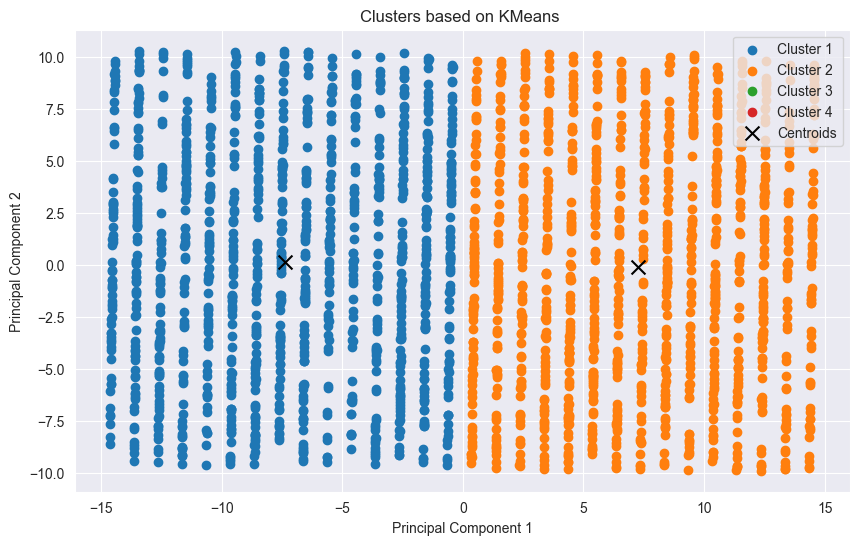

In [23]:
#Використання PCA для зменшення розмірності
pca = PCA(n_components=2)  # Вибираємо 2 головні компоненти для прикладу
X_pca = pca.fit_transform(x)

# Кластеризація з KMeans з k = 2 - загальна кількість класів
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_pca)

# Отримання міток кластерів та центроїдів
cluster_labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Візуалізація кластерів
plt.figure(figsize=(10, 6))

# Відокремлення точок для кожного кластера та відображення їх на графіку
for i in range(4):
    plt.scatter(X_pca[cluster_labels == i, 0], X_pca[cluster_labels == i, 1], label=f'Cluster {i+1}')

# Відображення центроїдів
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', color='k', s=100, label='Centroids')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Clusters based on KMeans ')
plt.legend()
plt.grid(True)
plt.show()

Кількість кластерів: 197
Кількість шуму: 618


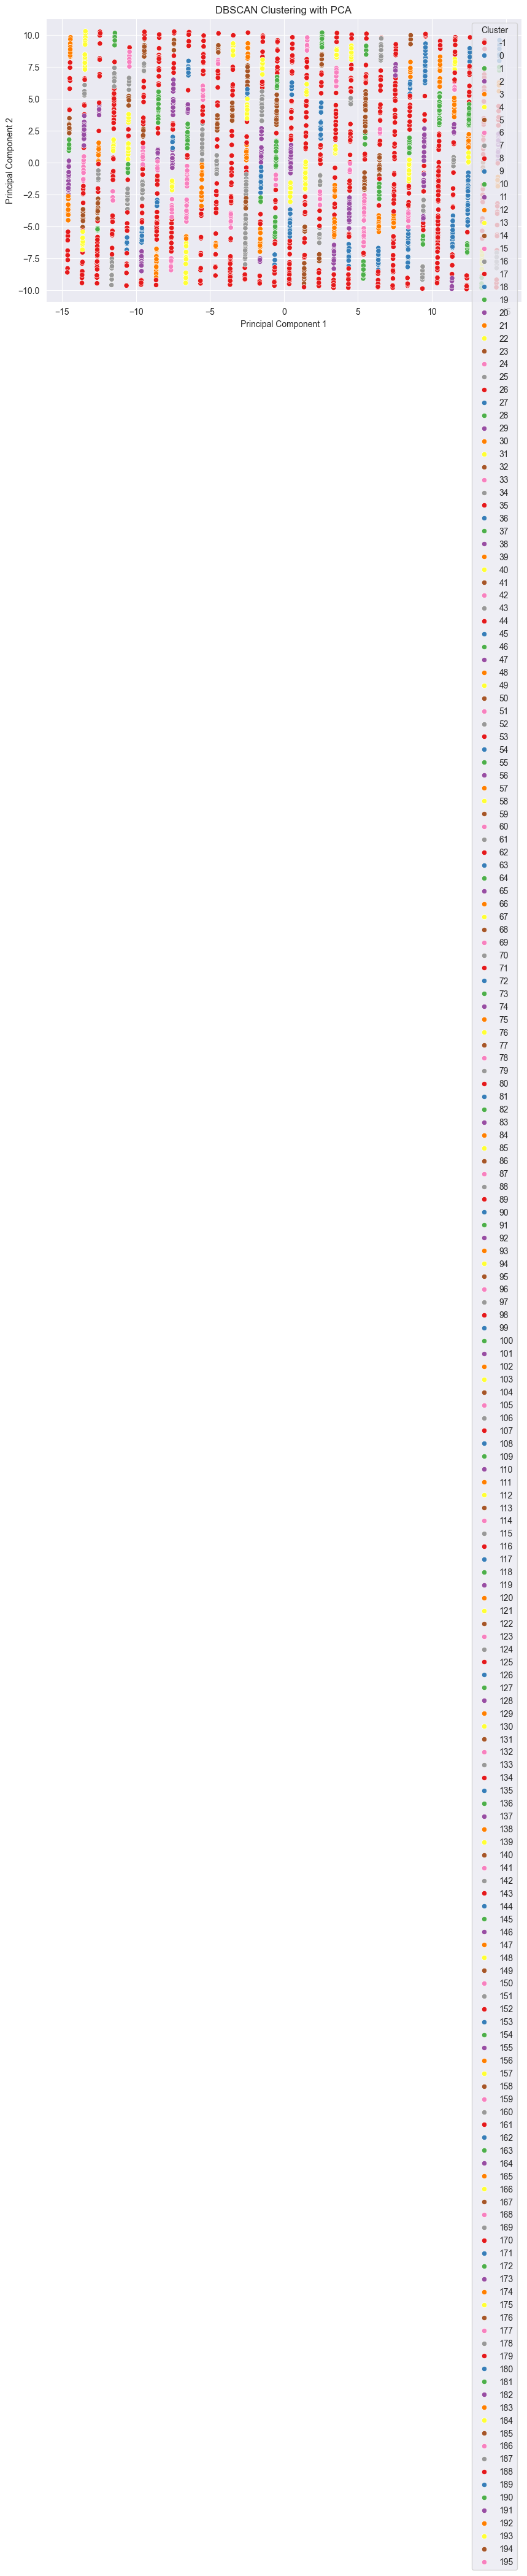

In [24]:
# Запускаємо DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
df['Cluster'] = dbscan.fit_predict(X_pca)

# Виводимо кількість кластерів та кількість шуму
n_clusters = len(set(df['Cluster'])) - (1 if -1 in df['Cluster'] else 0)
n_noise = list(df['Cluster']).count(-1)
print(f'Кількість кластерів: {n_clusters}')
print(f'Кількість шуму: {n_noise}')

# Візуалізація результатів
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df['Cluster'], palette='Set1', legend='full')
plt.title('DBSCAN Clustering with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()